In [1]:
#!pip install scikit-surprise 

If the above code does not work for you please run the below code in anaconda prompt to install the surprise package:

**conda install -c conda-forge scikit-surprise**


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import surprise
from surprise import SVD, accuracy

In [3]:
from sqlalchemy import create_engine

In [4]:
engine=create_engine('sqlite:///C:\\SQLite\\recommendation.db')

In [5]:
con=engine.connect()

In [6]:
con=engine.connect()
data=pd.read_sql_query("Select * from rating", engine)
data.head()

,userID,placeID,rating
0,U1077,135085,2
1,U1077,135038,2
2,U1077,132825,2
3,U1077,135060,1
4,U1068,135104,1


In [7]:
data['userID'].nunique()

138

In [8]:
data['placeID'].nunique()

130

In [9]:
data.rating.value_counts()

2    486
1    421
0    254
Name: rating, dtype: int64

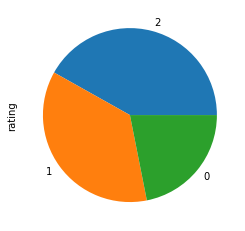

In [10]:
data.rating.value_counts().plot(kind='pie')
plt.show()

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1161 entries, 0 to 1160
Data columns (total 3 columns):
userID     1161 non-null object
placeID    1161 non-null int64
rating     1161 non-null int64
dtypes: int64(2), object(1)
memory usage: 27.3+ KB


In [12]:
data.isnull().sum()

userID     0
placeID    0
rating     0
dtype: int64

In [13]:
data = data[['userID', 'placeID', 'rating']]

In [14]:
data.head()

,userID,placeID,rating
0,U1077,135085,2
1,U1077,135038,2
2,U1077,132825,2
3,U1077,135060,1
4,U1068,135104,1


In [15]:
from surprise import Reader, Dataset
reader = Reader()
data = Dataset.load_from_df(data[['userID', 'placeID', 'rating']], reader)

In [16]:
from surprise.model_selection import train_test_split

trainset, testset = train_test_split(data, test_size=0.25,random_state=1)

In [17]:
# we'll use the SVD algorithm
algo=SVD(random_state=1)
# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)

In [18]:
predictions = algo.test(testset)

In [19]:
accuracy.rmse(predictions)

RMSE: 0.7340


0.7339830043332856

In [20]:
trainset

In [21]:
from collections import defaultdict

In [22]:
def get_top_n(predictions, n=10):

  top_n = defaultdict(list)
  for uid, iid, true_r, est, _ in predictions:
    top_n[uid].append((iid,est))

  # then sort the predictions for user and retrieve the highest ones.
  for uid, user_ratings in top_n.items():
    user_ratings.sort(key=lambda x: x[1], reverse=True)
    top_n[uid] = user_ratings[:n]

    return top_n

In [23]:
top_n = get_top_n(predictions, n=10)

In [24]:
top_n

defaultdict(list,
            {'U1091': [(132861, 1.298472655690371),
              (135035, 1.2544623389410188)],
             'U1097': [(132884, 1.5725096265976681),
              (132955, 1.7375435056951984),
              (135086, 1.4064033904826367)],
             'U1061': [(132572, 1.2553085481826476),
              (135075, 1.503068419903327),
              (132723, 1.5097124774970947),
              (135048, 1.468045705602869),
              (132955, 1.7306532332177835)],
             'U1099': [(132834, 1),
              (135060, 1),
              (132872, 1),
              (135043, 1),
              (135042, 1.1675624709747903)],
             'U1003': [(132754, 1.3068466854020924),
              (135075, 1.3769434195307761),
              (132922, 1.31499465104694),
              (132937, 1.2004653990472522)],
             'U1038': [(132858, 1.2692340912632434),
              (132854, 1.3086230349296653),
              (132861, 1.2165788730337734)],
             'U1060': [(132